In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# データを読み込み、探索

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Learning/GoalsAndGaps_replication_files_ECMA/ore_no_causalforest.csv")

In [ ]:
df

,Unnamed: 0,treat,lictec2,motivation,barriers,consiglio_lictec2,stdmatIII,stditaIII,school,perc_participation_orient,...,dad_educ_mis,std_cit_latin,std_cit_afric,std_cit_asia,std_cit_easteur,province_pd,province_bs,province_mi,province_to,province_ge
0,1,0,0,NaN,NaN,1,NaN,NaN,5,NaN,...,1,0,0,1,0,0,1,0,0,0
1,2,0,0,NaN,NaN,0,-1.399596,-1.555945,112,NaN,...,0,0,0,0,1,1,0,0,0,0
2,3,0,0,NaN,NaN,0,NaN,NaN,82,NaN,...,1,1,0,0,0,0,0,1,0,0
3,4,1,0,NaN,NaN,1,NaN,NaN,121,0.000000,...,1,1,0,0,0,0,0,0,1,0
4,5,1,0,NaN,NaN,0,-0.207511,-0.960164,115,0.384615,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,1213,0,1,-0.275965,0.035673,0,0.150114,-0.860868,131,NaN,...,0,0,1,0,0,0,0,0,1,0
1213,1214,0,0,-0.794850,0.218068,0,-0.803554,-0.562978,112,NaN,...,0,0,0,1,0,1,0,0,0,0
1214,1215,1,1,NaN,NaN,1,1.103783,0.529286,101,0.000000,...,0,0,0,0,1,0,0,1,0,0
1215,1216,0,0,NaN,NaN,0,-1.161179,-0.265088,44,NaN,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   treat                1217 non-null   int64  
 1   lictec2              1217 non-null   int64  
 2   late                 1217 non-null   int64  
 3   female               1217 non-null   int64  
 4   immigrato_prima_gen  1217 non-null   int64  
 5   stdinvalsiI          1217 non-null   float64
 6   stdinvalsiI_2        1217 non-null   float64
 7   mom_working_class    1217 non-null   int64  
 8   mom_high_class       1217 non-null   int64  
 9   mom_home             1217 non-null   int64  
 10  mom_unemp            1217 non-null   int64  
 11  mom_miss             1217 non-null   int64  
 12  dad_working_class    1217 non-null   int64  
 13  dad_high_class       1217 non-null   int64  
 14  dad_home             1217 non-null   int64  
 15  dad_unemp            1217 non-null   i

In [4]:
df = df.drop(axis=1, columns=df.columns[0])

In [5]:
df = df.drop(axis=1, columns=df.columns[2:11])

In [6]:
df = df.drop(axis=1, columns = df.columns[7:17])

In [7]:
df.describe()

,treat,lictec2,late,female,immigrato_prima_gen,stdinvalsiI,stdinvalsiI_2,mom_working_class,mom_high_class,mom_home,...,dad_educ_mis,std_cit_latin,std_cit_afric,std_cit_asia,std_cit_easteur,province_pd,province_bs,province_mi,province_to,province_ge
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,...,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.490551,0.774856,0.257190,0.506163,0.554643,0.307470,0.553075,0.236647,0.124076,0.258833,...,0.407560,0.256368,0.194741,0.135579,0.412490,0.055053,0.179129,0.496302,0.202958,0.066557
std,0.500116,0.417849,0.437265,0.500168,0.497210,0.677432,0.774127,0.425199,0.329803,0.438174,...,0.491582,0.436807,0.396164,0.342482,0.492485,0.228178,0.383618,0.500192,0.402367,0.249356
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.986703,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,-0.170404,0.062528,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.301078,0.248417,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.766208,0.715665,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.442107,5.963888,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.immigrato_prima_gen

0       1
1       1
2       1
3       1
4       1
       ..
1212    0
1213    0
1214    1
1215    1
1216    1
Name: immigrato_prima_gen, Length: 1217, dtype: int64

std invalsiのstdってなんだ？標準化されたスコアってことか？？

In [ ]:
df.stdinvalsiI

0      -0.278840
1       0.301034
2       0.447595
3      -0.247215
4      -0.444550
          ...   
1212   -0.686664
1213   -0.259723
1214    0.810654
1215    0.033399
1216   -0.266096
Name: stdinvalsiI, Length: 1217, dtype: float64

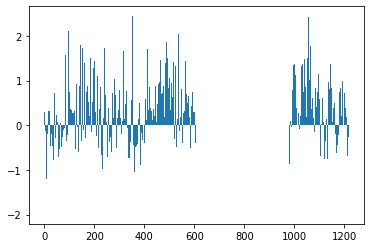

In [ ]:
plt.bar(height=df.stdinvalsiI.values, x=df.stdinvalsiI.index)
plt.show()

In [ ]:
score = df.stdinvalsiI.dropna()
score = score.sort_values().reset_index(drop=True)

score[700:900]

700    0.409362
701    0.409426
702    0.415670
703    0.415734
704    0.415734
         ...   
895    0.734467
896    0.740719
897    0.740719
898    0.740719
899    0.740719
Name: stdinvalsiI, Length: 200, dtype: float64

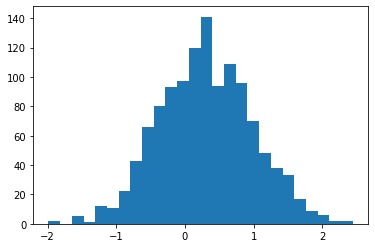

In [ ]:
plt.hist(score, bins='auto')
plt.show()

# 線形回帰をベイズで

In [ ]:
! pwd

/content


# 共変量バランスの確認

In [8]:
df.groupby(["treat"]).describe()

lictec2                                                late            \
        count     mean       std  min   25%  50%  75%  max  count      mean   
treat                                                                         
0       620.0  0.75000  0.433362  0.0  0.75  1.0  1.0  1.0  620.0  0.272581   
1       597.0  0.80067  0.399832  0.0  1.00  1.0  1.0  1.0  597.0  0.241206   

       ... province_to      province_ge                                     \
       ...         75%  max       count      mean       std  min  25%  50%   
treat  ...                                                                   
0      ...         0.0  1.0       620.0  0.059677  0.237079  0.0  0.0  0.0   
1      ...         0.0  1.0       597.0  0.073702  0.261504  0.0  0.0  0.0   

                 
       75%  max  
treat            
0      0.0  1.0  
1      0.0  1.0  

[2 rows x 264 columns]

dfをtreatmentで層化し、各変数ごとに1の割合を確認したい

In [9]:
df.groupby(["treat"]).mean()

,lictec2,late,female,immigrato_prima_gen,stdinvalsiI,stdinvalsiI_2,mom_working_class,mom_high_class,mom_home,mom_unemp,...,dad_educ_mis,std_cit_latin,std_cit_afric,std_cit_asia,std_cit_easteur,province_pd,province_bs,province_mi,province_to,province_ge
treat,,,,,,,,,,,,,,,,,,,,,
0,0.75000,0.272581,0.504839,0.561290,0.300623,0.581550,0.230645,0.124194,0.261290,0.048387,...,0.412903,0.275806,0.203226,0.140323,0.380645,0.046774,0.193548,0.516129,0.183871,0.059677
1,0.80067,0.241206,0.507538,0.547739,0.314581,0.523504,0.242881,0.123953,0.256281,0.061977,...,0.402010,0.236181,0.185930,0.130653,0.445561,0.063652,0.164154,0.475712,0.222781,0.073702


In [21]:
balance = df.groupby(["treat"]).mean()
balance.sort_values(by = [balance.index[0], balance.index[1]], inplace=True, axis=1)

In [25]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=084e0b5cf5159bcb8aa716af73e1bc1fa75bce1e7e82be573d741f921a21757d
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [26]:
import japanize_matplotlib

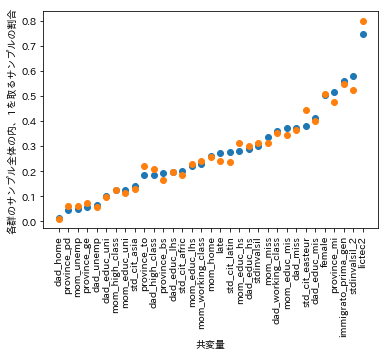

In [28]:
plt.scatter(x=balance.columns, y=balance.iloc[0,:])
plt.scatter(x=balance.columns, y=balance.iloc[1,:])
plt.xticks(rotation=90)
plt.xlabel("共変量")
plt.ylabel("各群のサンプル全体の内、1を取るサンプルの割合")

plt.show()

# ITTを確認

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.0 MB/s 
     |████████████████████████████████| 9.8 MB 38.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=b08e26f1d8ce778562ea236799a62d7de30e995184c9513c7452e22fdccc1c4b
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=39e76f5cea1d2a3b41f706f56fc4a66902b1b571efc9464d6cd4838659025096
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pingouin as pg
result = pg.ttest(df.loc[df.treat==1, "lictec2"], df.loc[df.treat==0, "lictec2"])
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.121052,1212.796051,two-sided,0.03412,"[0.0, 0.1]",0.121438,0.591,0.562082


In [ ]:
result["T"].values[0]

2.121051861421766

In [ ]:
pg.bayesfactor_ttest(result["T"].values[0], len(df.loc[df.treat==1, "lictec2"]), len(df.loc[df.treat==0, "lictec2"]))

0.5912811925035505

# 介入効果を傾向スコアで --> いやRCTだから調整する意味わからんでしょ

In [ ]:
pip install causalinference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 3.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression

%matplotlib inline

style.use("fivethirtyeight")
pd.set_option("display.max_columns", 6)

In [ ]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/Learning/GoalsAndGaps_replication_files_ECMA/ore_no_causalforest.csv")

In [ ]:
df

,treat,lictec2,school,...,province_mi,province_to,province_ge
0,0,0,5,...,0,0,0
1,0,0,112,...,0,0,0
2,0,0,82,...,1,0,0
3,1,0,121,...,0,1,0
4,1,0,115,...,0,1,0
...,...,...,...,...,...,...,...
1212,0,1,131,...,0,1,0
1213,0,0,112,...,0,0,0
1214,1,1,101,...,1,0,0
1215,0,0,44,...,1,0,0


In [ ]:
df = df.drop(axis=1, columns=df.columns[0])

In [ ]:
df = df.drop(axis=1, columns=df.columns[2:7])

In [ ]:
df = df.drop(axis=1, columns = df.columns[3:6])

In [ ]:
df = df.drop(axis=1, columns = df.columns[8:13])

In [ ]:
df = df.drop(axis=1, columns = df.columns[9:13])

In [ ]:
df = df.drop(axis=1, columns = df.columns[8])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   treat                1217 non-null   int64  
 1   lictec2              1217 non-null   int64  
 2   school               1217 non-null   int64  
 3   late                 1217 non-null   int64  
 4   female               1217 non-null   int64  
 5   immigrato_prima_gen  1217 non-null   int64  
 6   stdinvalsiI          1217 non-null   float64
 7   stdinvalsiI_2        1217 non-null   float64
 8   mom_working_class    1217 non-null   int64  
 9   mom_high_class       1217 non-null   int64  
 10  mom_home             1217 non-null   int64  
 11  mom_unemp            1217 non-null   int64  
 12  mom_miss             1217 non-null   int64  
 13  dad_working_class    1217 non-null   int64  
 14  dad_high_class       1217 non-null   int64  
 15  dad_home             1217 non-null   i

In [ ]:
smf.ols("lictec2~ treat", data=df).fit().summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7500,0.017,44.757,0.000,0.717,0.783
treat,0.0507,0.024,2.118,0.034,0.004,0.098


今回は一旦schoolの固定効果は無視して傾向スコアを算出する

In [ ]:
def doubly_robust(df, X, T, Y):
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    mu0 = LinearRegression().fit(df.query(f"{T}==0")[X], df.query(f"{T}==0")[Y]).predict(df[X])
    mu1 = LinearRegression().fit(df.query(f"{T}==1")[X], df.query(f"{T}==1")[Y]).predict(df[X])
    return np.mean(df[T]*(df[Y] - mu1)/ps + mu1) - np.mean((1-df[T])*(df[Y] - mu0)/(1-ps) + mu0)

In [ ]:
T = 'treat'
Y = 'lictec2'
X = df.columns.drop(['school', T, Y])

doubly_robust(df, X, T, Y)

-709960536.3456947

In [ ]:
from joblib import Parallel, delayed # for parallel processing
import multiprocessing
n_cpus = multiprocessing.cpu_count()



np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=n_cpus)(delayed(doubly_robust)(df.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

In [ ]:
print(f"ATE 95% CI:", (np.percentile(ates, 2.5), np.percentile(ates, 97.5)))

ATE 95% CI: (-2928741177.0376945, 3022750582.3665423)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


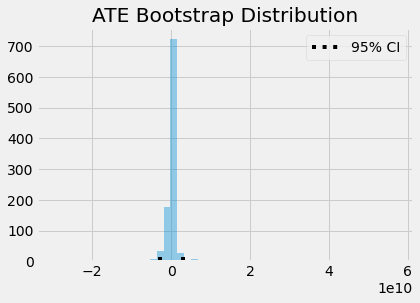

In [ ]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 20, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 20, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

# variable importanceを可視化

In [ ]:
feature = pd.read_csv("/content/drive/MyDrive/Learning/GoalsAndGaps_replication_files_ECMA/Variable_Importance.csv")

In [ ]:
feature

,Unnamed: 0,V1,variable
0,1,0.356975,stdinvalsiI
1,2,0.217568,stdinvalsiI_2
2,3,0.070814,educmother3
3,4,0.036666,educfather4
4,5,0.031133,late
5,6,0.029678,province2
6,7,0.022241,female
7,8,0.020077,occmother5
8,9,0.017476,citizenship3
9,10,0.016497,citizenship2


In [ ]:
feature.index

RangeIndex(start=0, stop=28, step=1)

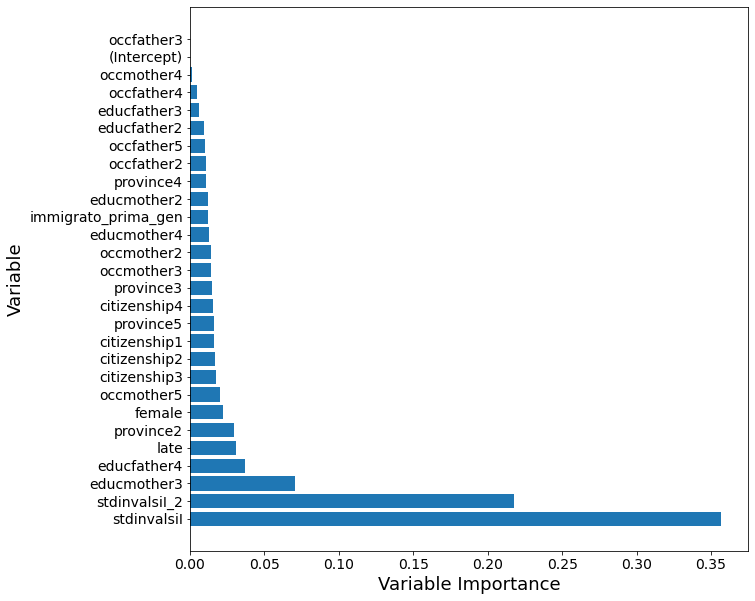

In [ ]:
label = feature.variable.values
indices = feature.index

# 特徴量の重要度の棒グラフ
fig =plt.figure (figsize = (10,10))

plt.barh(range(len(feature)), feature.V1[indices])

plt.yticks(range(len(feature)), label[indices], fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Variable", fontsize=18)
plt.xlabel("Variable Importance", fontsize=18)
plt.show()